In [1]:
#CNN Model Builder

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras import layers,models
from tensorflow.keras.layers import BatchNormalization,Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os






Data set loading- Tradional methoad

In [39]:
def load_my_dataset(dataset_path):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)  # Get the names of the subfolders (classes)
    print(class_names)
    print(len(class_names))

    for class_index, class_name in enumerate(class_names):
        #print(class_index)
        class_path = os.path.join(dataset_path, class_name)
        image_list = os.listdir(class_path) 
        for image_name in image_list:
            image_path = os.path.join(class_path, image_name)
            image = cv.imread(image_path)
            #print(image_path)
            # cv.imshow('Orginal image',image)   

            # cv.waitKey(2)
            # cv.destroyAllWindows() 
            image2Scale=cv.resize(image,(256,256),interpolation=cv.INTER_AREA)
            images.append(image2Scale)
            labels.append(class_index)

    return (np.array(images), np.array(labels)), (np.array(images), np.array(labels)) 



dataset_path = r'D:\Books\MS robotics\pde4434-Intelligent sensing\cw2\archive\New_dataset'




(training_images,training_labels),(testing_images,testing_labels)=load_my_dataset(dataset_path)


# for label in testing_labels:
#     print (f"testing : {label}")

training_images,testing_images=training_images/255,testing_images/255 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'reverse', 'skip', 'wild', 'wild 2', 'wild 4']
15


In [37]:
make_some_noise()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**Loading data set to tensorflow imageDataGenerator**

In [50]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation settings
datagen = ImageDataGenerator( rescale=1./255,
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformation
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Random horizontal flip
    vertical_flip=True,           # Random vertical flip
    brightness_range=[0.5, 1.5],  # Random brightness adjustment
    validation_split=0.2,         # Splitting the data for validation
    fill_mode='nearest'           # How to fill in newly created pixels
)

# Load and augment training data
train_generator = datagen.flow_from_directory(
    r'D:\Books\MS robotics\pde4434-Intelligent sensing\cw2\archive\myData\UNocard_Custome_Set_train_test',
    target_size= (256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training')

# Load test/validation data (without augmentation)

test_generator = datagen.flow_from_directory(
    r'D:\Books\MS robotics\pde4434-Intelligent sensing\cw2\archive\myData\UNocard Custome Set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 7907 images belonging to 15 classes.
Found 2239 images belonging to 15 classes.


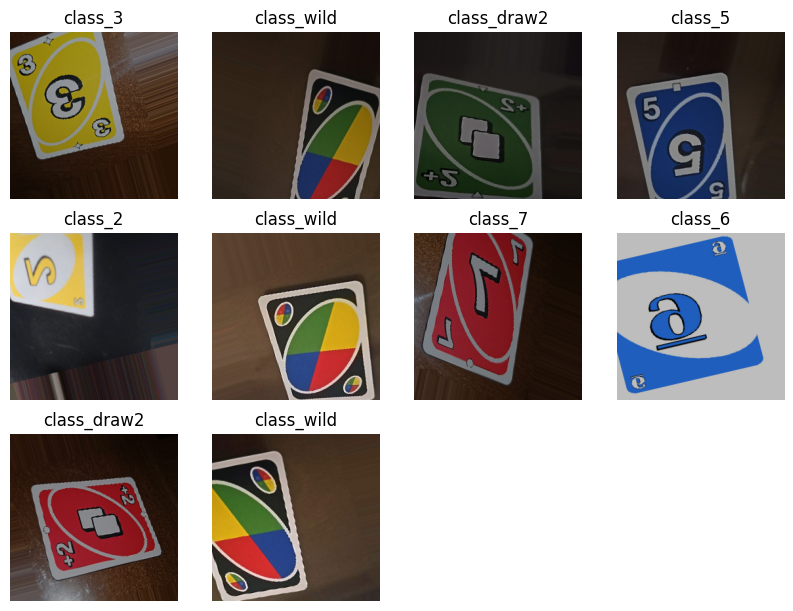

In [51]:
import matplotlib.pyplot as plt

class_names=['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_draw2', 'class_reverse', 'class_skip', 'class_wild', 'class_wild4']


# Get a batch of images and labels
images, labels = next(train_generator)

# Plot the images with their corresponding class names
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])  # Assuming class_names is defined
    plt.axis("off")
plt.show()


In [38]:

testing_images=testing_images[:10]
testing_labels=training_labels[:10]

In [40]:
#run for traditional methoad
from sklearn.model_selection import train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)


**Model Building**

In [53]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [54]:
#when running with generator
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())#this reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(15,activation='softmax'))

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,32

 Total params: 3,391,951 (12.94 MB)

 Trainable params: 3,389,455 (12.93 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [56]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
history=model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5


c:\Users\kkvij\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 1204s 5s/step - accuracy: 0.0816 - loss: 2.7686 - val_accuracy: 0.0683 - val_loss: 2.9042
Epoch 2/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 1096s 4s/step - accuracy: 0.1584 - loss: 2.5127 - val_accuracy: 0.1050 - val_loss: 2.6037
Epoch 3/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 1027s 4s/step - accuracy: 0.2041 - loss: 2.3043 - val_accuracy: 0.1733 - val_loss: 2.2712
Epoch 4/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 960s 4s/step - accuracy: 0.2521 - loss: 2.1263 - val_accuracy: 0.1929 - val_loss: 2.8995
Epoch 5/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 935s 4s/step - accuracy: 0.2992 - loss: 1.9717 - val_accuracy: 0.2046 - val_loss: 2.8572


In [44]:
#when running with data set created from traditional method
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_images,training_labels,epochs=30,validation_data=(testing_images,testing_labels))

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.0783 - loss: 2.8171 - val_accuracy: 0.0769 - val_loss: 2.7027
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.1135 - loss: 2.6744 - val_accuracy: 0.1025 - val_loss: 2.7055
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.1428 - loss: 2.5349 - val_accuracy: 0.1150 - val_loss: 2.6642
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.1726 - loss: 2.3914 - val_accuracy: 0.1452 - val_loss: 2.6245
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.2226 - loss: 2.1851 - val_accuracy: 0.1407 - val_loss: 2.8588
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.2740 - loss: 2.0999 - val_accuracy: 0.1219 - val_loss: 3.2464
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.3013 - loss: 1.9171 - val_accuracy: 0.1731 - val_loss: 2.4710
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.3169 - loss: 1.8409 - val_accuracy: 0.2289 - v

In [47]:
loss,accuracy=model.evaluate(testing_images,testing_labels)
print(f'Loss: {loss}')
print(f'accuracy: {accuracy}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 537ms/step - accuracy: 0.4112 - loss: 2.7264
Loss: 2.90555477142334
accuracy: 0.46241459250450134


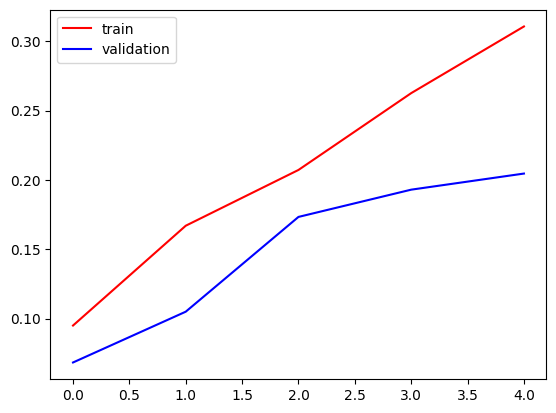

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

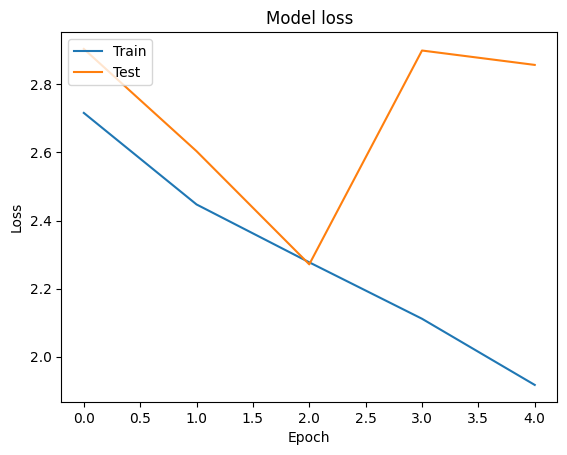

In [59]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [60]:
#saving model
model.save('UNO_with_agumentation_set.h5')
#model.save('Image_Classifier_youtube.keras')

In [32]:
from tensorflow.keras import layers,models
model=models.load_model('UNO_with_old_way_96_7_accuracy.h5')

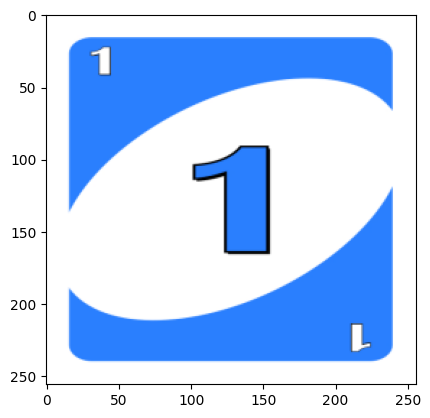

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1
prdiction is class_1


In [33]:
import cv2 as cv
import numpy as np
img=cv.imread(r"D:\Books\MS robotics\pde4434-Intelligent sensing\cw2\archive\myData\class_1\Blue_1 - Copy (6).jpg")
width=256
height=256
resized_image=cv.resize(img,(width,height),interpolation=cv.INTER_AREA)
#cv.imshow('Orginal image',img)
#cv.imshow('resixed imag',resized_image)
rgb_img=cv.cvtColor(resized_image,cv.COLOR_BGR2RGB)
plt.imshow(rgb_img,cmap=plt.cm.binary)
plt.show()
class_names=['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_draw2', 'class_reverse', 'class_skip', 'class_wild', 'class_wild4']
#class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'reverse', 'skip', 'wild', 'wild 2', 'wild 4']

prediction=model.predict(np.array([rgb_img])/255)
index=np.argmax(prediction)
print(index)

max_confidence=prediction[0][index]# get the probability 

accuracy_threshould=0.4
if max_confidence>=accuracy_threshould:
    

    print(f"prdiction is {class_names[index]}")
    cv.putText(img,class_names[index],(50,50),cv.FONT_HERSHEY_SIMPLEX,1, (0, 255, 0), 2, cv.LINE_AA)
else:
    print("prediction uncertain")
#cv.imshow('Orginal image',img)   

cv.waitKey(0)
cv.destroyAllWindows() 
            

